# Tarea - Caminata aleatoria y simulación de apuestas

Jonathan Diaz

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t=0.001$ es un intervalo de tiempo y
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule tres caminatas con $10$ segundos (10000 pasos) y represéntelo en un gráfico 3D.

**Solución:**

- Simulación 3D de 10000 pasos:

Para la simulación inicial, se establecieron las variables de control: $pasos = 10000$ (correspondientes a $10$ segundos con $\Delta t=0.001$) y $dt = 0.001$. Se inicializaron listas vacías para las coordenadas $x$, $y$, $z$ y se les añadió la posición inicial $(0, 0, 0)$.

Se implementó un bucle for para realizar los $10000$ pasos de la caminata. En cada iteración, se generó un desplazamiento aleatorio $dx, dy, dz \in \{-1, 1\}$ para cada eje utilizando np.random.choice([-1, 1]). Luego, la nueva posición $(x_0, y_0, z_0)$ se calculó usando la fórmula de la caminata, multiplicando el desplazamiento por $\sqrt{\Delta t}$ y sumándolo a la posición anterior:$$x_0=x_{i-1}+dx\sqrt{\Delta t}$$

Estos nuevos valores se agregaron a sus respectivas listas. Finalmente, las listas de coordenadas se convirtieron a arrays de NumPy y se utilizó matplotlib para generar y mostrar la gráfica 3D de la trayectoria.

- Obtención de la última posición:

El modelo se simplificó en una función caminata_3D_ultima_pos para calcular únicamente la posición final. Dentro de la función, se genera una matriz de $10000 \times 3$ con valores de $\{-1, 1\}$ representando todos los pasos en los tres ejes (pasos_vec = np.random.choice([-1, 1], size=(pasos, 3))). La posición final es la suma de los desplazamientos a lo largo de cada eje (pasos_vec.sum(axis=0))

- Probabilidad de condiciones específicas:

Se realizaron $N=1000$ simulaciones de la caminata simplificada para estimar la probabilidad de que la posición final satisfaga las condiciones $x>1$, $y>2$ y $z>0$.Se creó un array resultados almacenando la posición final de cada una de las 1000 caminatas. Luego, se aplicó una máscara booleana (condicion) para identificar cuáles de las 1000 caminatas cumplían simultáneamente las tres desigualdades. El número de caminatas exitosas se contó (conteo) y la probabilidad se determinó como el promedio de la condición booleana (condicion.mean()).

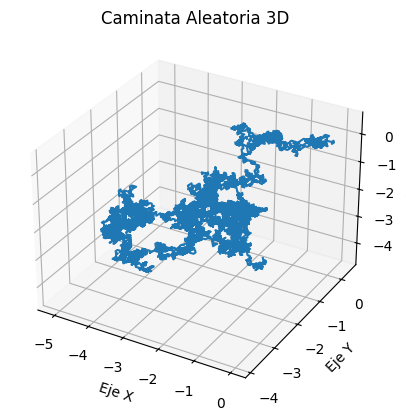

In [157]:
import numpy as np
import matplotlib.pyplot as plt

pasos=10000
dt=0.001

x=[]
y=[]
z=[]

x.append(0)
y.append(0)
z.append(0)

for i in range(1,pasos+1):
  dx=np.random.choice([-1,1])
  dy=np.random.choice([-1,1])
  dz=np.random.choice([-1,1])
  x0=x[i-1]+dx*np.sqrt(dt)
  y0=y[i-1]+dy*np.sqrt(dt)
  z0=z[i-1]+dz*np.sqrt(dt)
  x.append(x0)
  y.append(y0)
  z.append(z0)

x=np.array(x)
y=np.array(y)
z=np.array(z)

fig,ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot(x,y,z)
plt.title('Caminata Aleatoria 3D')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
ax.set_zlabel('Eje Z')
plt.show()

Modifique la caminata anterior de tal forma que solo le regrese la última posición.

In [203]:
import numpy as np

def caminata_3D_ultima_pos(pasos=10000):
    pasos_vec=np.random.choice([-1,1],size=(pasos,3))
    posicion_final = pasos_vec.sum(axis=0)
    return posicion_final
caminata_3D_ultima_pos()


array([   6,  -56, -166])

**Resultado:**

En esta simulación obtuvimos que la última posición sería $x=6$, $y=-56$ y $z=-166$

Simule 1000 caminatas con este nuevo modelo de movimiento browniano y diga la probabilidad de que las partículas satisfagan $x>1$, $y>2$ y $z>0$.

In [211]:
N=1000
pasos=10000

resultados=np.array([caminata_3D_ultima_pos(pasos) for _ in range(N)])
condicion=(resultados[:,0]>1)&(resultados[:,1]>2)&(resultados[:,2]>0)
conteo=condicion.sum()
probabilidad=condicion.mean()

probabilidad

np.float64(0.116)

**Resultado:**

La probabilidad de que en 1000 caminatas se satisfaga que $x>1$, $y>2$ y que $z>0$ es de $11.6\%$

---

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.

**Solución:**

- Evolución del capital hasta la quiebra:

Se definió una función graficar_evolucion que simula una única partida hasta que el capital es cero o menor. Se inicializó el capital y una lista $C2$ para registrar la trayectoria del capital, comenzando con el valor inicial.

Un bucle while se ejecuta mientras el capital sea positivo. Dentro del bucle:

1 - Se evalúa la condición $C2[-1] \ge 6$ para determinar el monto de la apuesta (la mitad del capital o 2).

2- Se simula el volado usando random.randint(0, 1), donde $0$ representa una ganancia y $1$ una pérdida.

3 - El capital se actualiza sumando o restando el monto de la apuesta.
4 - El nuevo valor del capital se agrega a la lista $C2$.

Una vez que el capital es $\le 0$, el bucle finaliza y se utiliza matplotlib para trazar la evolución del capital a lo largo de los volados.

- Número promedio de volados para quedar en quiebra:

Se implementó una función juego similar a la anterior, pero que retorna únicamente el número total de volados necesarios para que el capital sea cero o menor.

Se empleó la simulación de Monte Carlo con $npc=10000$ apostadores. Un ciclo for iteró $npc$ veces, y en cada iteración se llamó a la función juego() para simular una partida completa y almacenar el número de volados en la lista resultados. El promedio de volados para quedar en quiebra (p_volados) se calculó tomando la media de todos los resultados obtenidos.

- Histograma del número de volados:

Para visualizar la distribución de los resultados, se generó un histograma utilizando la lista resultados obtenida en la simulación de Monte Carlo. Se configuraron los bins para que cada barra represente un número entero de volados, mostrando la frecuencia con la que cada número de volados ocurrió hasta la quiebra.

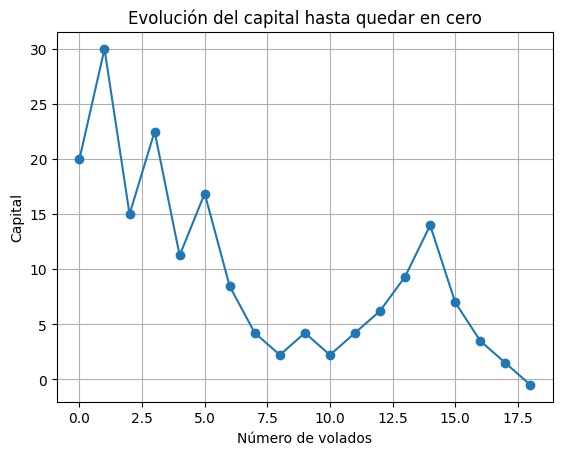

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import random

def graficar_evolucion(C1=20):
    capital=C1
    C2=[capital]
    while C2[-1]>0:
        if C2[-1]>=6:
            apuesta=C2[-1] / 2
        else:
            apuesta=2
        volado=random.randint(0, 1)
        if volado==0:  # cara
            capital+=apuesta
        else:  # cruz
            capital-=apuesta
        C2.append(capital)

    plt.plot(C2, marker='o')
    plt.title('Evolución del capital hasta quedar en cero')
    plt.xlabel('Número de volados')
    plt.ylabel('Capital')
    plt.grid(True)
    plt.show()

graficar_evolucion()



2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.

In [212]:

def juego(C1=20):
    capital=C1
    volados=0
    while capital>0:
        if capital>=6:
            apuesta=capital / 2
        else:
            apuesta=2
        volado=random.randint(0, 1)
        if volado==0:  # cara
            capital+=apuesta
        else:            # cruz
            capital-=apuesta
        volados+=1
    return volados

npc=10000
resultados=[]

for _ in range(npc):
    resultados.append(juego())

p_volados=np.mean(resultados)
p_volados

np.float64(26.0893)

**Resultado:**

En este caso que se uso la simulación montecarlo para 10,000 apostadores, obtuvimos que el número promedio para quedar en la quiebra es de $26.08$ volados, pero redondeando tenemos que es de $26$ volados.

3. Muestre un histograma del número de volados.

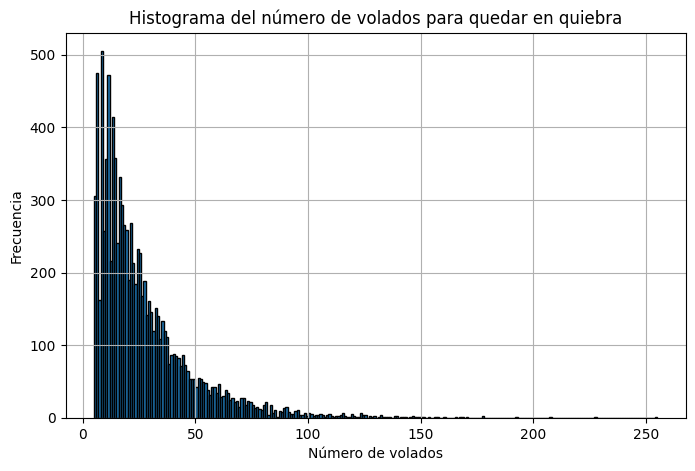

In [200]:
plt.figure(figsize=(8,5))
plt.hist(resultados,bins=range(min(resultados),max(resultados)+2),edgecolor='black')
plt.title('Histograma del número de volados para quedar en quiebra')
plt.xlabel('Número de volados')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()